In [25]:
from pathlib import Path, PurePath
from collections import Counter
import re
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

filtered_tables = list(Path("../filteredData").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables))


num of tables: 519107


In [2]:
allowed_labels = Path("./allowedLabels.txt").read_text().lower().split("\n")

In [26]:
class DataCounter:
    def __init__(self, paths):
        self.labels_counter = Counter()
        self.width_counter = Counter()

        for label in allowed_labels:
            self.labels_counter[label] = 0

        for path in paths:
            with open(path) as file:
                labels = file.readline().replace("\n", "").lower().split("|")

            for label in labels:
                self.labels_counter[label] += 1

            self.width_counter[len(labels)] += 1



In [27]:
dc = DataCounter(filtered_tables)

In [28]:
def print_labels(dc: DataCounter, top: int, ignore_allowed=False):
    pairs = dc.labels_counter.most_common(top)
    for (x, y) in pairs:
        if ignore_allowed and x.lower() in allowed_labels:
            continue
        print(x, y)

In [5]:
def print_widths(dc: DataCounter):
    pairs = dc.width_counter.most_common(50)
    for (x, y) in pairs:
        print(f"widht: {x}, num: {y}")

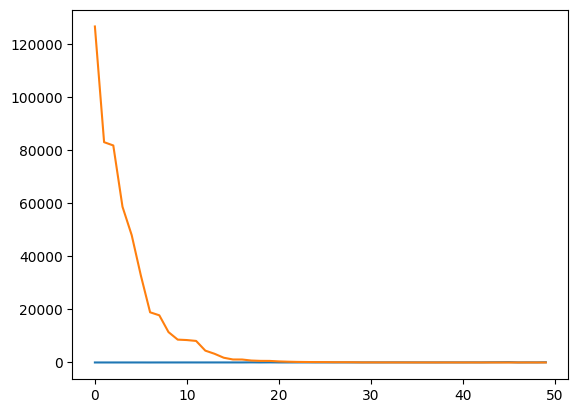

In [6]:
plt.plot(dc.width_counter.most_common(50))

In [ ]:
print_widths(dc)

In [31]:
print_labels(dc, 10000, ignore_allowed=True)

результаты 66959
рецензии 27191
всего 20562
итого 18980
выступление 18404
еврокубки 17834
категория 17312
финал 16975
кубок 15256
чемпионат 14956
роль в фильмах 11810
соревнование 11809
турнир 11118
чистота крови 10656
титулы попокрытиям 9544
титулы по меступроведенияматчей турнира 9502
спортсмены 9475
полуфинал 9469
патронус 8928
квалификация 8214
факультет 8088
пример 7790
счёт 7516
период 7120
кубки 6983
очки 6541
волшебная палочка 6336
высшаяпозиция 6293
золото 6241
серебро 6217
бронза 6193
позиции в чартах 5977
прочие 5749
дисциплина 5715
продажи 5620
турниры 5535
второй 5474
третий 5461
первый 5263
голы 5245
сертификация 5239
№ всезоне 5198
№ всериале 5171
награды и номинации 5164
легенда: 5058
итог 5035
запасной 4941
четвёртый 4936
высшая позиция 4833
показатели 4713
соревнования 4690
соперник 4647
регулярный сезон 4529
премия 4509
четвертьфинал 4429
кубок лиги 4386
чарты 4383
победитель 4351
гонка 4257
сборная 4131
высшая позиция в чартах 4012
команда 1 3940
команда 2 3935
счёт

### After filtrating out those tables that have unallowed labels 
---

In [39]:
filtered_tables2 = list(Path("../filteredData2").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables2))

num of tables: 55367


In [40]:
dc2 = DataCounter(filtered_tables2)

In [41]:
print_labels(dc2, 3330)

роль 21364
актёр 19198
год 18330
название 7936
результат 7346
место 4896
категория 4727
награда 4173
город 3818
работа 3402
клуб 3117
дата 2751
фильм 2672
спортсмен 2654
страна 2628
альбом 2524
имя 2471
команда 2120
песня 1917
исполнитель 1793
режиссёр 1753
должность 1628
позиция 1609
оригинальное название 1466
игрок 1327
население, человек 1283
кино 1232
время 1130
сезон 1120
население 974
русское название 907
описание 889
персонаж 808
ссылка 735
дата рождения 715
тип 634
гражданство 575
статус 572
номер 546
изображение 529
годы 507
дистанция 500
количество 485
год выпуска 483
источник 440
условные цветовые обозначения 438
html 398
артист 389
местонахождение 371
сценарист 340
продюсер 340
место проведения 324
организация 321
бортовой номер 290
код 278
скорость ветра 274
численность 273
регион 261
продажи 244
формат 241
символ 229
событие 219
ссылки 211
лига 193
титул 184
численность населения 181
национальность 175
месяц 168
стадия 153
класс 132
канал 129
группа 122
жанр 121
платформа

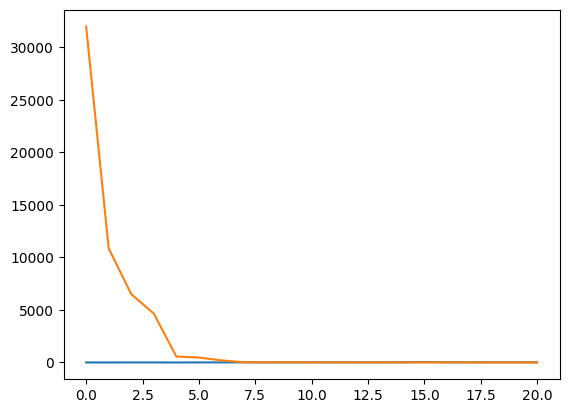

In [42]:
plt.plot(dc2.width_counter.most_common(50))

In [43]:
print_widths(dc2)

widht: 2, num: 31971
widht: 3, num: 10854
widht: 4, num: 6501
widht: 5, num: 4659
widht: 1, num: 570
widht: 6, num: 472
widht: 7, num: 200
widht: 14, num: 23
widht: 11, num: 17
widht: 8, num: 16
widht: 12, num: 15
widht: 13, num: 14
widht: 9, num: 14
widht: 10, num: 12
widht: 19, num: 10
widht: 41, num: 7
widht: 20, num: 5
widht: 15, num: 2
widht: 24, num: 2
widht: 23, num: 2
widht: 16, num: 1


***

In [9]:
num = np.random.randint(0, 30000)

print(filtered_tables2[num])
table = filtered_tables2[num]
pd.read_csv(table, delimiter="|")


../filteredData2/8518419/table_0.csv


,Актёр,Роль
0,Николай Граббе,Гиена-дедушка
1,Мария Виноградова,Гиена-бабушка
2,Всеволод Ларионов,Гиена-папа
3,Ирина Карташёва,Гиена-мама
4,Вячеслав Невинный,Гиена-дядя
5,Нина Гуляева,Гиена-тётя
6,А. Соловьёв,Гиена-сын
7,Лариса Удовиченко,Гиена-дочь
8,Ия Саввина,Гиена-просто гиена
9,Леонид Марков,Лев
